# Dog vs Cat

<a href='https://www.kaggle.com/c/dogs-vs-cats/rules'>Kaggle Competition link</a>

<a href='https://sb-jr.github.io/projects/dogs_vs_cats_classifier/dogs_vs_cats_classifier.html'>Live Demo</a>

The images are labeled either cat.#.jpg or dog.#.jpg 

Create a classifier which will classify whether a given image is of a dog or cat.

In [166]:
import tensorflow as tf
print('GPU using: '+ str(len(tf.config.experimental.list_physical_devices('GPU'))))
for i in tf.config.experimental.list_logical_devices('GPU'):
    print('No of Logical GPUs available: '+ str(i))
    
print('CPU using: '+ str(len(tf.config.experimental.list_physical_devices('CPU'))))
for i in tf.config.experimental.list_logical_devices('CPU'):
    print('No of Logical CPUs available: '+ str(i))

GPU using: 1
No of Logical GPUs available: LogicalDevice(name='/job:localhost/replica:0/task:0/device:GPU:0', device_type='GPU')
CPU using: 1
No of Logical CPUs available: LogicalDevice(name='/job:localhost/replica:0/task:0/device:CPU:0', device_type='CPU')


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython.display import display
import cv2


Bad key "text.kerning_factor" on line 4 in
/home/sbjr/my_bin/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data_path = '../data/dogs_vs_cats/train'
df = pd.DataFrame(columns=['file_path', 'is_dog', 'height', 'width'])
filenames = os.listdir(data_path)
print(len(filenames))
for filename in filenames:
    category, id_, _ = filename.split('.')
    is_dog = 0
    if category == 'dog':
        is_dog = 1
    image = load_img(os.path.join(data_path, filename))
    width, height = image.size
    df = df.append([{'id': id_, 'file_path': filename, 'is_dog': is_dog, 'height': height, 'width': width}])

25000


In [3]:
df = df.set_index(['id'])
display(df.head())
display(df.shape)

,file_path,is_dog,height,width
id,,,,
9892,dog.9892.jpg,1,388,415
9106,cat.9106.jpg,0,188,249
5635,cat.5635.jpg,0,499,394
11582,cat.11582.jpg,0,375,499
1416,dog.1416.jpg,1,499,432


(25000, 4)

In [4]:
df['is_dog_string'] = df['is_dog'].map({1:'dog', 0:'cat'})

In [5]:
df.head()

,file_path,is_dog,height,width,is_dog_string
id,,,,,
9892,dog.9892.jpg,1,388,415,dog
9106,cat.9106.jpg,0,188,249,cat
5635,cat.5635.jpg,0,499,394,cat
11582,cat.11582.jpg,0,375,499,cat
1416,dog.1416.jpg,1,499,432,dog


In [6]:
print('Minimum dimension: '+ str(df.width.min()) + 'x' + str(df.height.min()))
print('Maximum dimension: '+ str(df.height.max()) + 'x' + str(df.width.max()))

Minimum dimension: 42x32
Maximum dimension: 768x1050


## Checking data distribution

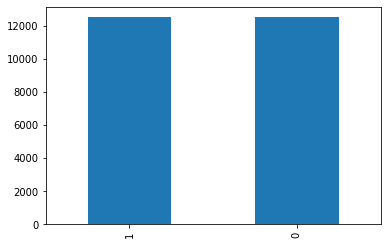

In [7]:
df['is_dog'].value_counts().plot.bar()

## Previewing sample image

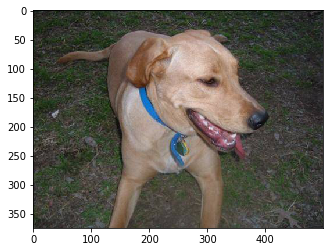

In [8]:
sample = random.choice(filenames)
sample_image = load_img(os.path.join(data_path, sample))
plt.imshow(sample_image)

## Data Preprocessing

In [34]:
from sklearn.model_selection import train_test_split

In [48]:
IMAGE_HEIGHT=128
IMAGE_WIDTH=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNEL=3
BATCH_SIZE=32
EPOCH=50

In [36]:
train_df, val_df = train_test_split(df, test_size = 0.2, random_state=40)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
print(train_df.shape)
print(val_df.shape)
display(train_df.head())
display(val_df.head())

(20000, 5)
(5000, 5)


,file_path,is_dog,height,width,is_dog_string
0,dog.8217.jpg,1,456,499,dog
1,cat.11448.jpg,0,299,200,cat
2,cat.5483.jpg,0,374,500,cat
3,dog.7560.jpg,1,338,247,dog
4,dog.10594.jpg,1,499,450,dog


,file_path,is_dog,height,width,is_dog_string
0,cat.4272.jpg,0,169,350,cat
1,cat.920.jpg,0,374,500,cat
2,dog.732.jpg,1,375,499,dog
3,dog.5589.jpg,1,239,318,dog
4,dog.11977.jpg,1,499,358,dog


In [37]:
train_img_generator = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

In [38]:
train_generator = train_img_generator.flow_from_dataframe(
    train_df,
    data_path,
    x_col='file_path',
    y_col='is_dog_string',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE)

Found 20000 validated image filenames belonging to 2 classes.


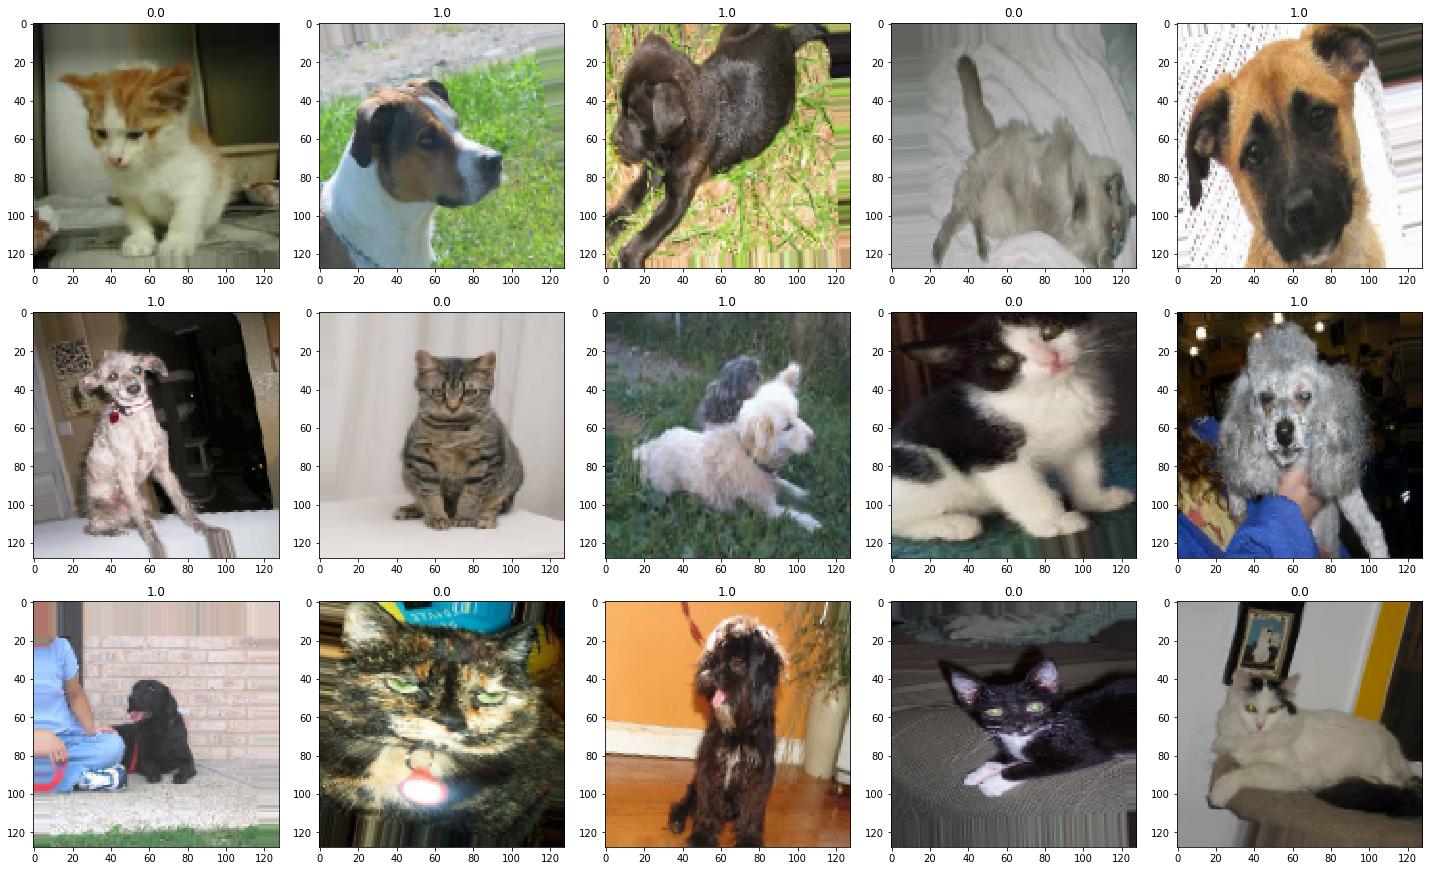

In [39]:
## Checking the image generator

plt.figure(figsize=(20,20))
for i in range(15):
    plt.subplot(5,5, i+1)
    for X, y in train_generator:
        img = X[0]
        plt.title(y[0])
        plt.imshow(img)
        break
plt.tight_layout()
plt.show()

In [42]:
val_img_generator=ImageDataGenerator(rescale=1./255)
val_generator = val_img_generator.flow_from_dataframe(
    val_df,
    data_path,
    x_col='file_path',
    y_col='is_dog_string',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE
)

Found 5000 validated image filenames belonging to 2 classes.


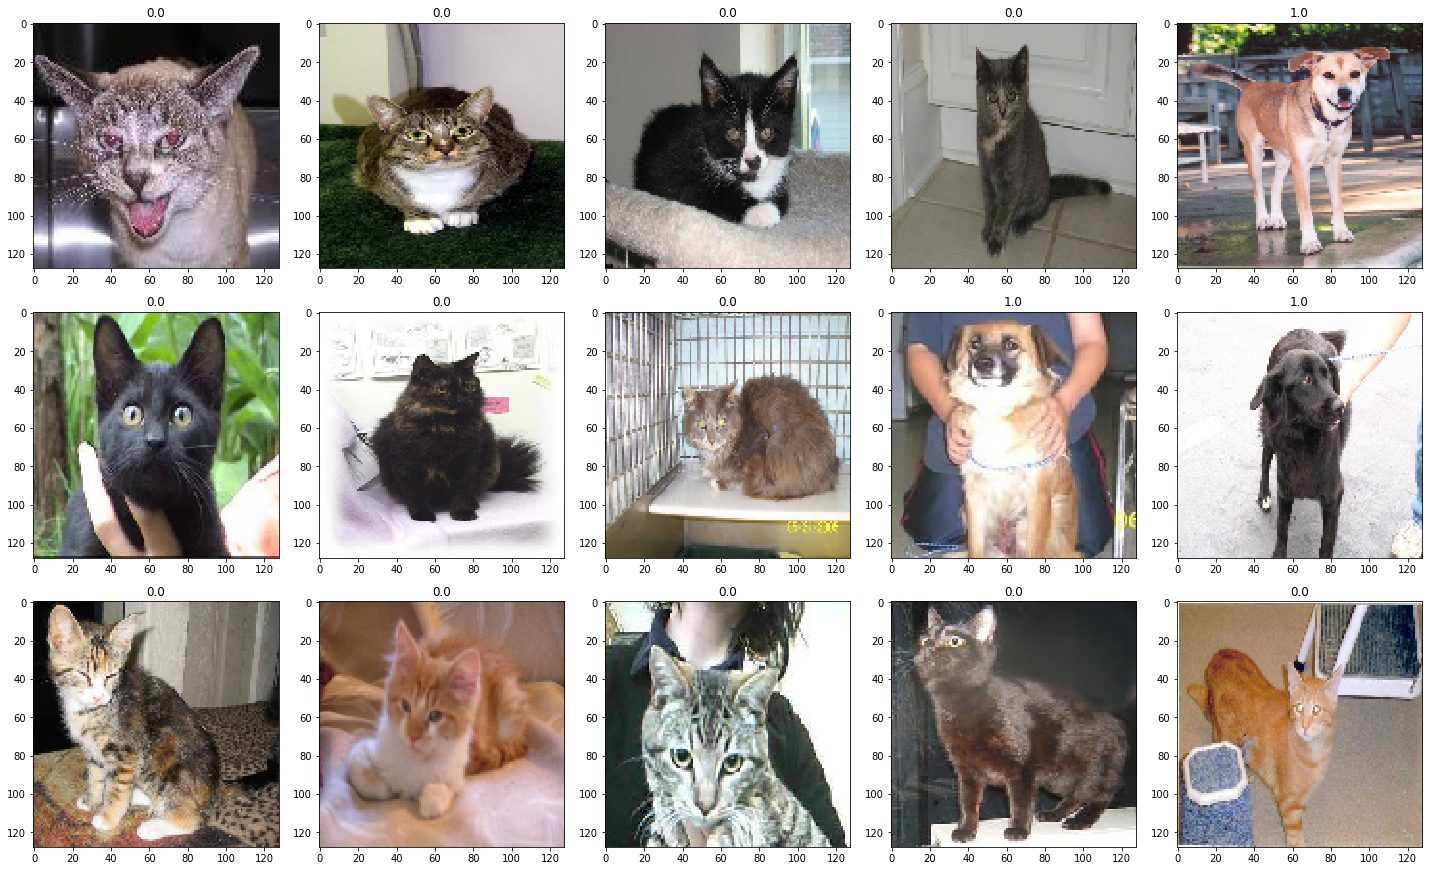

In [43]:
## Checking the image generator

plt.figure(figsize=(20,20))
for i in range(15):
    plt.subplot(5,5, i+1)
    for X, y in val_generator:
        img = X[0]
        plt.title(y[0])
        plt.imshow(img)
        break
plt.tight_layout()
plt.show()

# Model Creation

<img src='dogs_vs_cats_model.svg' />

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization

In [64]:
def get_cnn_model(optimizer='adam', with_droput=False, dropout_param=0):
    model = Sequential()
    model.add(Conv2D(filters=32, 
                    kernel_size=(3,3),
                    strides=(1,1),
                    padding='valid',
                    activation='relu',
                    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNEL),
             ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    if with_droput:
        model.add(Dropout(dropout_param))
    
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    if with_droput:
        model.add(Dropout(dropout_param))
        
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    if with_droput:
        model.add(Dropout(dropout_param))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    if with_droput:
        model.add(Dropout(dropout_param))
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [65]:
adam_model_no_droput = get_cnn_model()

In [66]:
adam_model_no_droput.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_25 (Batc (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_26 (Batc (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 128)     

## Defining Callbacks

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [29]:
earlystopping = EarlyStopping(patience=10, verbose=1)

In [30]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [31]:
callbacks= [earlystopping, learning_rate_reduction]

In [67]:
adam_no_dropout_history = adam_model_no_droput.fit(train_generator, epochs=EPOCH, validation_data=val_generator, callbacks=callbacks, verbose=1)

Epoch 1/50
625/625 [==============================] - 138s 222ms/step - loss: 0.6421 - acc: 0.6779 - val_loss: 0.5237 - val_acc: 0.7314
Epoch 2/50
625/625 [==============================] - 134s 215ms/step - loss: 0.4935 - acc: 0.7628 - val_loss: 0.6079 - val_acc: 0.6770
Epoch 3/50
625/625 [==============================] - 133s 213ms/step - loss: 0.4416 - acc: 0.7936 - val_loss: 0.4577 - val_acc: 0.7812
Epoch 4/50
625/625 [==============================] - 134s 214ms/step - loss: 0.3953 - acc: 0.8183 - val_loss: 0.6361 - val_acc: 0.6878
Epoch 5/50
625/625 [==============================] - 134s 214ms/step - loss: 0.3526 - acc: 0.8468 - val_loss: 0.4046 - val_acc: 0.8196
Epoch 6/50
625/625 [==============================] - 137s 219ms/step - loss: 0.3272 - acc: 0.8569 - val_loss: 0.6403 - val_acc: 0.7552
Epoch 7/50
625/625 [==============================] - 130s 209ms/step - loss: 0.3041 - acc: 0.8689 - val_loss: 0.2846 - val_acc: 0.8766
Epoch 8/50
625/625 [============================

## Saving the model

In [68]:
adam_model_no_droput.save_weights('catsVdogs_adam_nodp.h5')

## Visualizing the performance

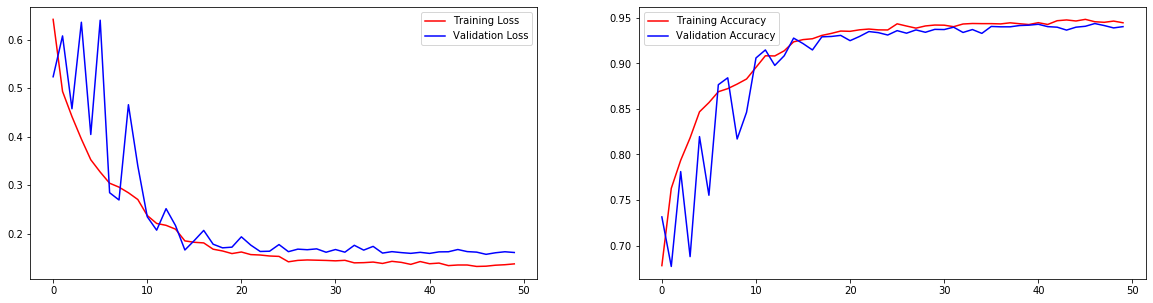

In [84]:
history=adam_no_dropout_history
_, (sbplt1, sbplt2) = plt.subplots(1,2, figsize=(20,5))
sbplt1.plot(history.history['loss'], color='r', label='Training Loss')
sbplt1.plot(history.history['val_loss'], color='b', label='Validation Loss')
sbplt1.legend(loc='best')

sbplt2.plot(history.history['acc'], color='r', label='Training Accuracy')
sbplt2.plot(history.history['val_acc'], color='b', label='Validation Accuracy')
sbplt2.legend(loc='best')
plt.show()

# Working on Test Data

In [92]:
test_dir='../data/dogs_vs_cats/test1'
test_df = pd.DataFrame(columns=['file_path'])

In [95]:
test_df['file_path']=os.listdir(test_dir)

In [96]:
test_df.head()

,file_path
0,5662.jpg
1,10663.jpg
2,9043.jpg
3,6053.jpg
4,5423.jpg


In [98]:
test_img_generator = ImageDataGenerator(rescale=1./255)

In [105]:
test_generator = test_img_generator.flow_from_dataframe(test_df, 
                                                        test_dir, 
                                                        x_col='file_path', 
                                                        y_col=None, 
                                                        class_mode=None, 
                                                        target_size=IMAGE_SIZE, 
                                                        batch_size=BATCH_SIZE, 
                                                        shuffle=False)

Found 12500 validated image filenames.


In [106]:
predict = adam_model_no_droput.predict_classes(test_generator, verbose=1)

391/391 [==============================] - 34s 86ms/step


In [107]:
display(predict)

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int32)

In [115]:
test_df['predictions']=predict

In [116]:
test_df.head()

,file_path,predictions
0,5662.jpg,1
1,10663.jpg,1
2,9043.jpg,0
3,6053.jpg,0
4,5423.jpg,0


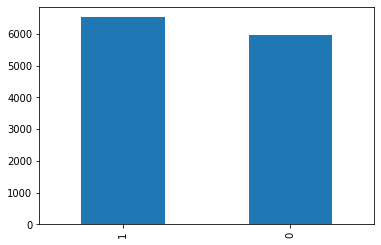

In [117]:
test_df['predictions'].value_counts().plot.bar()

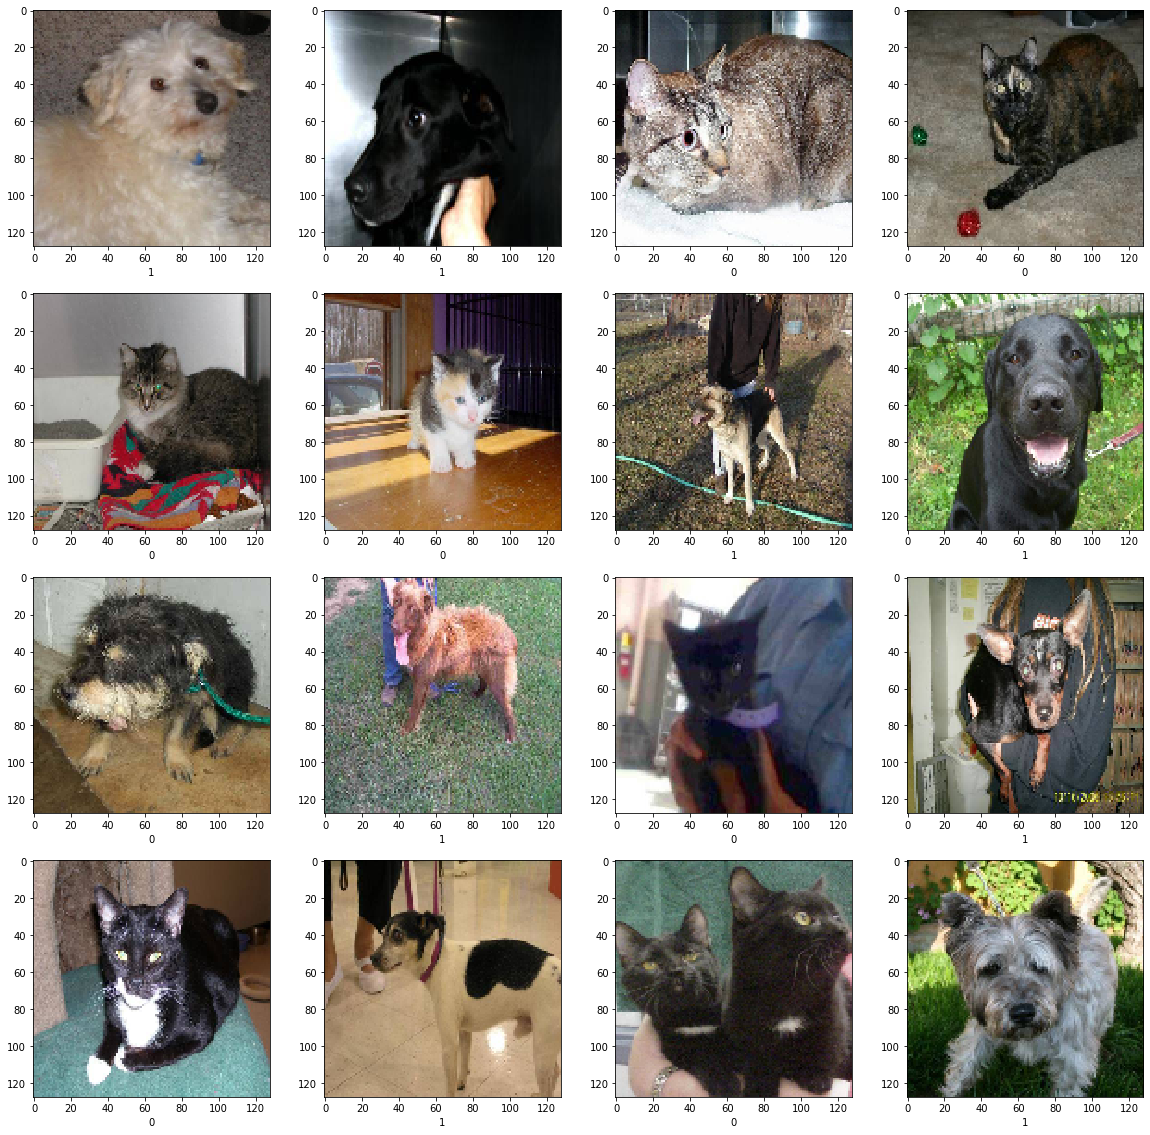

In [121]:
plt.figure(figsize=(20,20))
for i in range(16):
    file, pred = test_df.loc[i]
    plt.subplot(4,4, i+1)
    img = load_img(os.path.join(test_dir, file), target_size=IMAGE_SIZE)
    plt.imshow(img)
    plt.xlabel(pred)
plt.show()

In [153]:
img = load_img('../data/dogs_vs_cats/train/cat.48.jpg', target_size=IMAGE_SIZE)

In [154]:
type(img)

PIL.Image.Image

In [155]:
np_img = np.array(img)/255
np_img = np.array([np_img])
print(np_img.shape)

(1, 128, 128, 3)


In [156]:
print(np_img.max())
print(np_img.min())

1.0
0.0


In [157]:
simple_predict = adam_model_no_droput.predict_classes(np_img, verbose=1)

1/1 [==============================] - 0s 2ms/sample


In [158]:
simple_predict

array([[0]], dtype=int32)

In [169]:
adam_model_no_droput_json = adam_model_no_droput.to_json()
with open('catVdogs_adam_nodp.json', 'w') as json_file:
    json_file.write(adam_model_no_droput_json)

In [170]:
import tensorflowjs as tfjs

In [171]:
tfjs.converters.save_keras_model(adam_model_no_droput, 'catVdogs_adam_nodp.json')

/home/sbjr/my_bin/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/tensorflowjs/converters/keras_h5_conversion.py:122: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
